# Suplementary Information figures for publication ExoPhot I 
Generation of figures for the first paper of the series dedicated to ExoPhot to be added to the suplementary information document.

### Load libraries 
Load libraries and functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
import pandas as pd
import itertools
from os import walk
from pathlib import Path

### Define available cases to plot

In [2]:
pigm = ['ChlA', 'ChlB', 'BChlA', 'BChlB', 'Phot0-Zn']
hz = ['hzi','hzm','hzo']
star_type = ['a5v','g2v','m8v']
atmos_type = ['os1','os2','os3','os4']

# atmosphere label for the plot
atmosphere_label = ['Earth-like', 'highly oxidizing', 'weakly oxidizing', 'reducing']


### Choose colorblind color scheme

In [3]:
# https://gist.github.com/thriveth/8560036
CB_color_cycle = ['#377eb8', '#ff7f00','#4daf4a', '#e41a1c',
                  '#a65628', '#984ea3','#999999', '#dede00',
                 '#377eb8', '#ff7f00','#4daf4a', '#e41a1c',
                  '#a65628', '#984ea3','#999999', '#dede00']


### Retrieve star parameteres
Load auxiliary file containing solar radii (Rs) and habitable zone (hz) boundaries (inner, mid, outer) for different solar spectral types.

In [4]:
# load auxiliary file containing solar radii (Rs) and habitable zone (hz) boundaries (inner, mid, outer) for different solar spectral types
df_exo = pd.read_csv('../input/exosys_params.csv', comment = '#')
df_exo


,ST,Teff,Rs,Ls,hzi,hzm,hzo,S_hzi,S_hzm,S_hzo
0,a5v,8250.0,1.700,12.083850,2.503394,3.464906,3.911554,2624.57,1370.042,1075.024
1,f5v,6500.0,1.300,2.722901,1.188345,1.644768,1.856789,2624.57,1370.042,1075.024
2,g2v,5750.0,1.000,0.986650,0.715333,0.990080,1.117707,2624.57,1370.042,1075.024
3,k5v,4250.0,0.720,0.152655,0.281373,0.389444,0.439646,2624.57,1370.042,1075.024
4,m8v,2500.0,0.121,0.000516,0.016362,0.022646,0.025566,2624.57,1370.042,1075.024


### Define plot functions

In [5]:
def plot_pigment_absorption(wl, pigm_absorp, pigm_name, color, ax):
    """Helper function to plot absorption cross section
    """
 
    
    ax.plot(wl, pigm_absorp, label=pigm_name, color=color)
    
    ax.set_ylim(0,None)
    #ax.autoscale(enable=True, axis='x', tight=True)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1), useMathText = True, useOffset=False)    
    ax.set_ylim(0,0.00000000000000142)
    ax.set_ylabel('Absorption cross section (cm$^{2}$)',fontsize=12)
    ax.set_xlabel('Wavelength ($\AA$)',fontsize=12)
    
    ax.legend(loc="upper right",fontsize=11)




In [6]:
from scipy.ndimage.filters import uniform_filter1d


def plot_star_SED(wl, flux, star_name, color, ax):
    """Helper function to plot star SED
    """
    
    sampling = 25
    
    ax.plot(wl, uniform_filter1d(flux, size = sampling, axis = 0), label=star_name, color=color)
    
    ax.set_ylim(10E-12,10E9)
    ax.set_xlim(1000,10000)
    ax.set_yscale('log')
    #ax.autoscale(enable=True, axis='x', tight=True)
    #ax.set_ylim(0,370000)
    ax.set_ylabel('Stellar flux (erg cm$^{2} s^{-1} \AA^{-1}$)',fontsize=12)
    ax.set_xlabel('Wavelength ($\AA$)',fontsize=12)
    
    ax.legend(loc="lower right",fontsize=11)




In [7]:
def plot_atm_transmittance(wl, transmitance, star_name, hz_name, atmos_name, color, ax):
    """Helper function to plot atmospheric transmitance
    """
    
    ax.plot(wl, transmitance, label=atmos_name, color=color)
        
    ax.set_ylim(0,None)
    ax.autoscale(enable=True, axis='x', tight=True)
    #ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1), useMathText = True, useOffset=False)    
    #ax.set_title(star_name)
    #ax.set_ylabel('Atmospheric transmitance',fontsize=14)
    #ax.set_xlabel('Wavelength ($\AA$)',fontsize=14)    
    
    


## Pigments absorption cross section 
The molar extinction coeficient ($\epsilon_{\rm abs}$) of each pigment is retrieved from the input folder. This parameter is transformed to the pigment's absorption cross section  $\sigma{\rm abs}(\lambda)$ through:

\begin{equation}
\sigma_{\rm abs} (\lambda) = \frac{1000\log10}{N_A}\epsilon_{\rm abs}(\lambda),
\label{eq:sigma_epsilon}
\end{equation}

where $N_A$ is the Avogadro number, and $\sigma_{\rm abs}(\lambda)$ and $\epsilon_{\rm abs}(\lambda)$ are in units of cm$^2$ and M$^{-1}$ cm$^{-1}$, respectively. 
 

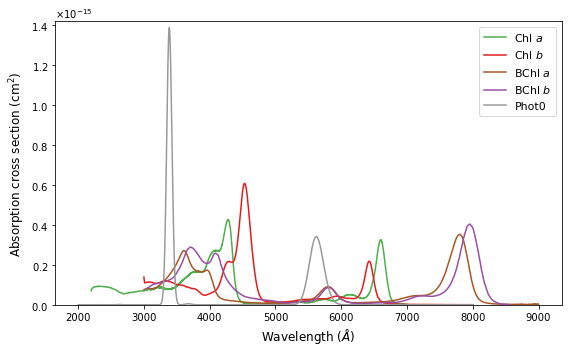

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

#Set the input folder of the pigments molar extinction files
pigm_file = "../input/pigments/" 

# pigment label for the plot
pigm_label = ['Chl $\it{a}$', 'Chl $\it{b}$', 'BChl $\it{a}$', 'BChl $\it{b}$', 'Phot0']

iterator = 0
#Iterate in pigment's names
for pigm_name in pigm:
    #2D array with pigment's molar extinction coefficient spectrum [nm; M-1 cm-1]
    pigm_absorp_array = np.loadtxt(pigm_file+pigm_name+'.txt',usecols=(0,1)) # [nm, M-1 cm-1]
    pigm_absorp_array = np.transpose(pigm_absorp_array)
    
    # from molar extinction coefficient (epsilon) to absorption cross section (cm2). See Eq. 2 in Marcos-Arenal et al. (2022).
    pigm_absorp_xsect=1000*np.log(10)*pigm_absorp_array[1]/const.N_A
    # from nm to Angstrom
    pigm_absorp_array[0] = 10*pigm_absorp_array[0]


    plot_pigment_absorption(pigm_absorp_array[0], pigm_absorp_xsect, pigm_label[iterator], CB_color_cycle[iterator+2], ax)
    iterator = iterator +1

plt.tight_layout()
plt.savefig('../output/figures/pigment_absorption_plot.pdf', dpi = 150)
plt.show()  


## Stellar flux
For the stars, we considered a solar type (G2 V, $T_{\rm eff}$ = 5750 K) and two extreme cases (A5 V, $T_{\rm eff}$ = 8250 K and M8 V, $T_{\rm eff}$ = 2500 K).


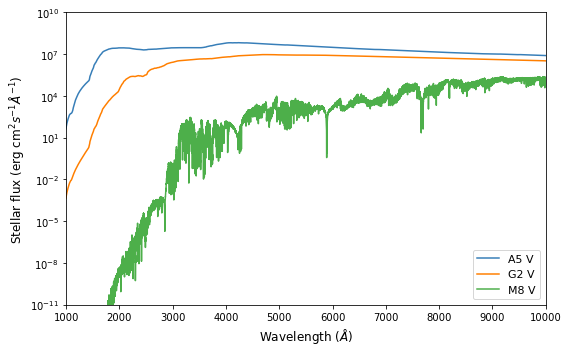

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

#Set the input folder of the SED files
star_folder = "../input/stellar/" 

# star label for the plot
star_label = ['A5 V', 'G2 V', 'M8 V']


iterator = 0
#Iterate in atmosphere's names
for star_name in star_type:
    
    # 2D array with stellar spectral flux density spectrum [Angstrom; erg cm-2 s-1 A-1]
    sed_array = np.loadtxt(star_folder+'SED_'+star_name+'.txt',usecols=(0,1)) # [nm, M-1 cm-1]
    sed_array = np.transpose(sed_array)
    
    # get solar radius and exoplanet orbit (in km), and Stellar Irradiance
    #Rs = 696340*df_exo.loc[np.where(df_exo.ST==star_name)[0][0], 'Rs']
    #sma = 1.495978707e+8*df_exo.loc[np.where(df_exo.ST==star_name)[0][0], 'hzm']
 
    # from ergs to Joules
    #sed_array[1] = sed_array[1]*1e-7
    # flux conversion to J/cm2/s/A and multiplication by solid angle subtended by star from exoplanet, (Rs/sma)^2
    # https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/castelli-and-kurucz-atlas   
    #sed_array[1] = sed_array[1]*(Rs/sma)**2


    plot_star_SED(sed_array[0],sed_array[1], star_label[iterator], CB_color_cycle[iterator], ax)
    iterator = iterator +1

plt.tight_layout()
plt.savefig('../output/figures/star_SED_plot.pdf', dpi = 150)
plt.show()  


### Atmosphere transmittance
The atmospheric transmittance spectrum has been synthesized with PUMAS (Villanueva et al. 2018, Smith et al. 2009, Edwards 1992) via the NASA-GSFC Planetary Spectrum Generator (PSG, Villanueva et al. 2018).
We considered 1 Earth-radius, 1 Earth-mass exoplanets orbiting in the inner, middle and outer part of the habitable zone (HZi, HZm and HZo) around their stars (and corresponding effective temperatures, $T_{\rm eff}$).
We also considered Earth-like (os1), highly oxidizing (os2), weakly oxydizing (os3), and reducing/early-Earth-like (os4) scenarios (R Hu, S Seager, W Bains, Photochemistry in terrestrial exoplanet atmospheres. I. Photo- 467.

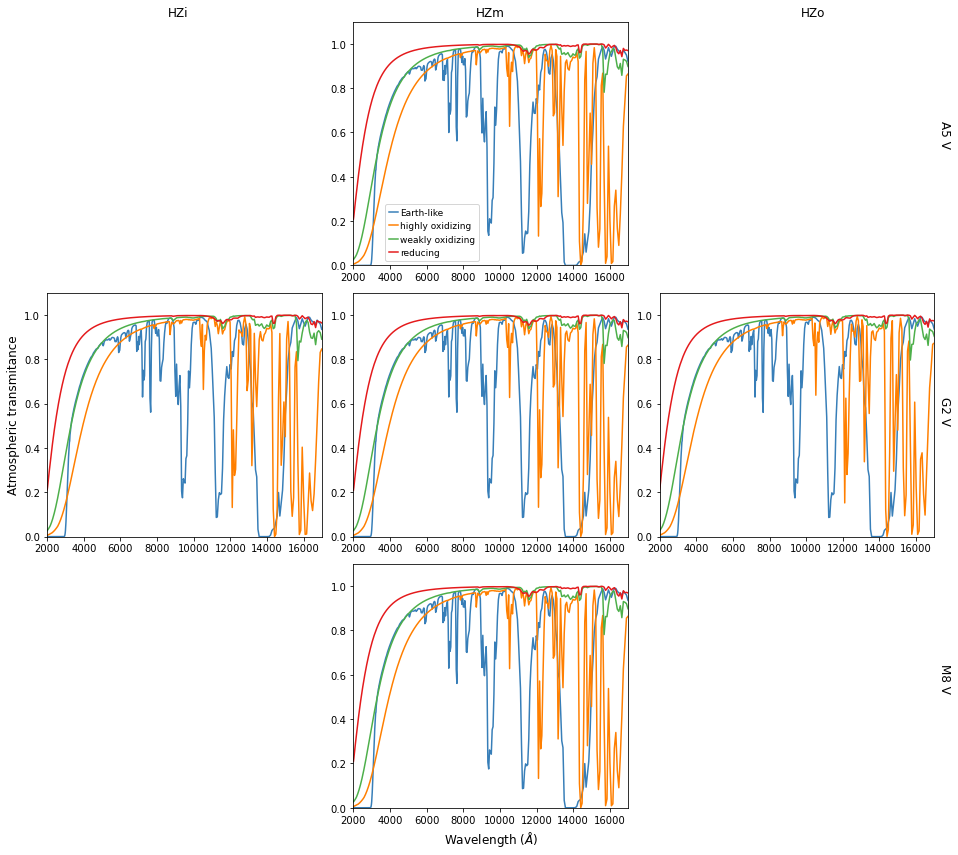

In [14]:

fig, ax = plt.subplots(len(star_type),len(hz),figsize=(14,12))

#Set the input folder of the atmosp files
atmos_folder = "../input/atmosphere/" 



##### iterate through atmosphere and pigment file names:
r1 = range(len(star_type))
r2 = range(len(hz))
r3 = range(len(atmos_type))


for ii, jj, kk in itertools.product(r1,r2,r3): # this is a nested loop

    #for the G2 V star there are inner, middle and outer HZ's (hzi,hzm,hzo)
    if ii == 1:
        # select atmosphere file names
        atm_file_name = atmos_folder + 'atm_' + star_type[ii] + '_' + hz[jj] + '_' + atmos_type[kk] + '.txt'
        
        # 2D array with atmospheric transmittance
        transmitance_array = np.loadtxt(atm_file_name,usecols=(0,1))    
        transmitance_array = np.transpose(transmitance_array)

        # from um to Angstroms
        transmitance_array[0] = transmitance_array[0]*1e4

        # plot transmitance_array
        plot_atm_transmittance(transmitance_array[0],transmitance_array[1], star_type[ii], hz[jj], atmosphere_label[kk], CB_color_cycle[kk], ax[ii,jj])
        
        
    #for the A5 V and M8 V there are only hzm.
    elif ii != 1 and jj == 1: 
        # select atmosphere file names
        atm_file_name = atmos_folder + 'atm_' + star_type[ii] + '_' + hz[jj] + '_' + atmos_type[kk] + '.txt'
        
        # 2D array with atmospheric transmittance
        transmitance_array = np.loadtxt(atm_file_name,usecols=(0,1))    
        transmitance_array = np.transpose(transmitance_array)
        
        # from um to Angstroms
        transmitance_array[0] = transmitance_array[0]*1e4
               
        # plot transmitance_array
        plot_atm_transmittance(transmitance_array[0],transmitance_array[1], star_type[ii], hz[jj], atmosphere_label[kk], CB_color_cycle[kk], ax[ii,1])
  
    else: #No data
        ax[ii,jj].axis('off')
    
    ax[ii,jj].set_ylim(0,1.1)

    ax[ii,0].set_ylabel('Atmospheric transmitance',fontsize=12)
    ax[-1,jj].set_xlabel('Wavelength ($\AA$)',fontsize=12)
    
ax[0,1].legend(loc = 'lower left', bbox_to_anchor=(0.1, 0., 0.5, 0.5), fontsize = 9, handletextpad = 0.2, handlelength = 1)

height = 0.97
width = 0.96

fig.text(0.20, height, 'HZi', horizontalalignment='center', verticalalignment='center', fontsize=12)
fig.text(0.51, height, 'HZm', horizontalalignment='center', verticalalignment='center', fontsize=12)
fig.text(0.83, height, 'HZo', horizontalalignment='center', verticalalignment='center', fontsize=12)

fig.text(width, 0.83, 'A5 V', horizontalalignment='center', verticalalignment='center', fontsize=12, rotation=-90)
fig.text(width, 0.51, 'G2 V', horizontalalignment='center', verticalalignment='center', fontsize=12, rotation=-90)
fig.text(width, 0.20, 'M8 V', horizontalalignment='center', verticalalignment='center', fontsize=12, rotation=-90)



plt.tight_layout()
plt.subplots_adjust(left=0.07, bottom=0.05, right=0.95, top=0.96)
plt.savefig('../output/figures/atm_transmittance_plot.pdf', dpi = 150)
plt.show()  

In [11]:
print(len(atmos_type),len(hz))

4 3
